<a href="https://colab.research.google.com/github/shamali95/ds_shamali_jiwane/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# =======================================
# Bitcoin Market Sentiment & Trader Behavior Analysis
# Web3 Trading Team Assignment – Shamali Jiwane
# =======================================

# 1. Setup & Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()


Saving historical_data.csv to historical_data.csv
Saving fear_greed_index.csv to fear_greed_index.csv


In [4]:
# Create directories to save output if running locally
import os
os.makedirs("csv_files", exist_ok=True)
os.makedirs("outputs", exist_ok=True)

In [6]:
# Load datasets
historical_data_df = pd.read_csv('historical_data.csv')
fear_greed_index_df = pd.read_csv('fear_greed_index.csv')

print("historical_data:")
display(historical_data_df.head())

print("fear_greed_index:")
display(fear_greed_index_df.head())

historical_data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


fear_greed_index:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [7]:
# 3. Preprocessing & Merging
# Convert date/time columns to datetime
historical_data_df['Timestamp IST'] = pd.to_datetime(historical_data_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')
fear_greed_index_df['date'] = pd.to_datetime(fear_greed_index_df['date'])

# Merge sentiment info into trader data (assuming by date)
historical_data_df['date_only'] = historical_data_df['Timestamp IST'].dt.date
fear_greed_index_df['date_only'] = fear_greed_index_df['date'].dt.date

# Merge datasets
merged_df = pd.merge(historical_data_df, fear_greed_index_df[['date_only', 'classification']],
                     on='date_only', how='left')

# Exploratory Data Analysis (EDA)
sns.set(style="whitegrid")


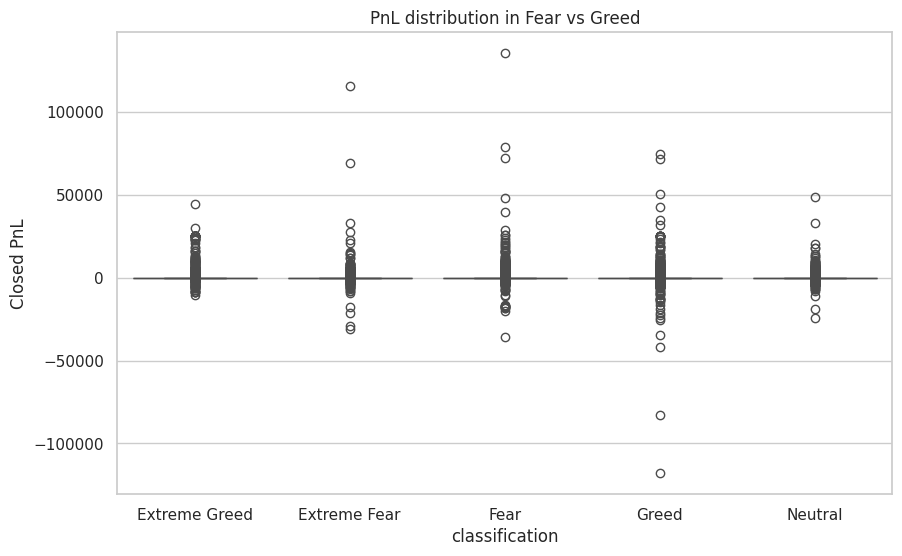

In [9]:
# 1. PnL vs Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title("PnL distribution in Fear vs Greed")
plt.savefig("outputs/pnl_sentiment.png")
plt.show()

**Display the first few rows:**

In [12]:
display(merged_df.head())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date_only,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


**Get information about the DataFrame (columns, data types, etc.):**

In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

**Access a specific column:**

In [14]:
# Replace 'ColumnName' with the actual column you want to access
display(merged_df['classification'].value_counts())

,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


**Filter the DataFrame:**

In [15]:
# Example: Filter for rows where the classification is 'Fear'
fear_df = merged_df[merged_df['classification'] == 'Fear']
display(fear_df.head())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date_only,classification
224,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.63005,28.7,18.08,BUY,2025-03-18 12:50:00,350000.0,Open Long,0.0,0x7b46ccfbc6de6d29ed63041fc7608b01bc00943d76ed...,80499480660,True,0.006074,8.210000e+14,1.740000e+12,2025-03-18,Fear
225,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.63007,3072.9,1936.14,BUY,2025-03-18 12:50:00,350028.7,Open Long,0.0,0x7b46ccfbc6de6d29ed63041fc7608b01bc00943d76ed...,80499480660,True,0.650543,6.870000e+13,1.740000e+12,2025-03-18,Fear
226,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.63007,2724.5,1716.63,BUY,2025-03-18 12:50:00,353101.6,Open Long,0.0,0x7b46ccfbc6de6d29ed63041fc7608b01bc00943d76ed...,80499480660,True,0.576786,3.790000e+14,1.740000e+12,2025-03-18,Fear
227,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.63029,1568.6,988.67,BUY,2025-03-18 12:50:00,355826.1,Open Long,0.0,0x7b46ccfbc6de6d29ed63041fc7608b01bc00943d76ed...,80499480660,True,0.332193,4.410000e+14,1.740000e+12,2025-03-18,Fear
228,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.63046,1473.6,929.05,BUY,2025-03-18 12:50:00,357394.7,Open Long,0.0,0x7b46ccfbc6de6d29ed63041fc7608b01bc00943d76ed...,80499480660,True,0.312159,9.660000e+14,1.740000e+12,2025-03-18,Fear


You can now use `merged_df` for further analysis, visualization, or any other operations you need to perform on your combined data. Let me know what you'd like to do next!

In [17]:
# Convert columns to numeric
merged_df["Execution Price"] = pd.to_numeric(merged_df["Execution Price"], errors="coerce")
merged_df["Size USD"] = pd.to_numeric(merged_df["Size USD"], errors="coerce")
merged_df["Start Position"] = pd.to_numeric(merged_df["Start Position"], errors="coerce")

# Mask to avoid divide-by-zero
valid_mask = (merged_df["Start Position"] > 0) & (merged_df["Execution Price"] > 0)

# Calculate estimated leverage
merged_df["Estimated Leverage"] = np.nan
merged_df.loc[valid_mask, "Estimated Leverage"] = (
    merged_df.loc[valid_mask, "Size USD"] / (merged_df.loc[valid_mask, "Start Position"] * merged_df.loc[valid_mask, "Execution Price"])
)

# Quick look
merged_df[["Execution Price", "Size USD", "Start Position", "Estimated Leverage"]].head()

,Execution Price,Size USD,Start Position,Estimated Leverage
0,7.9769,7872.16,0.000000,NaN
1,7.9800,127.68,986.524596,0.016219
2,7.9855,1150.63,1002.518996,0.143728
3,7.9874,1142.04,1146.558564,0.124704
4,7.9894,69.75,1289.488521,0.006770


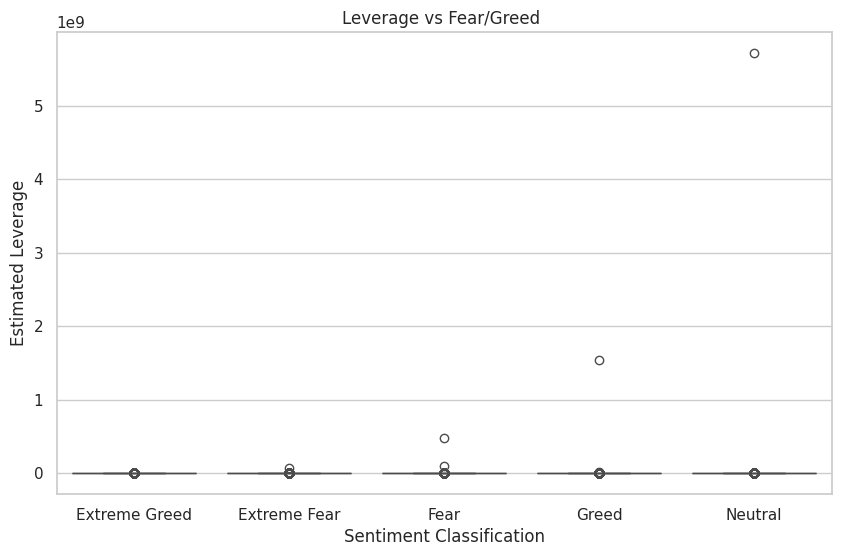

In [27]:
# 2. Leverage vs Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='Estimated Leverage', data=merged_df)
plt.title("Leverage vs Fear/Greed ")
plt.xlabel("Sentiment Classification")
plt.ylabel("Estimated Leverage")
plt.savefig("outputs/leverage_sentiment.png")
plt.show()

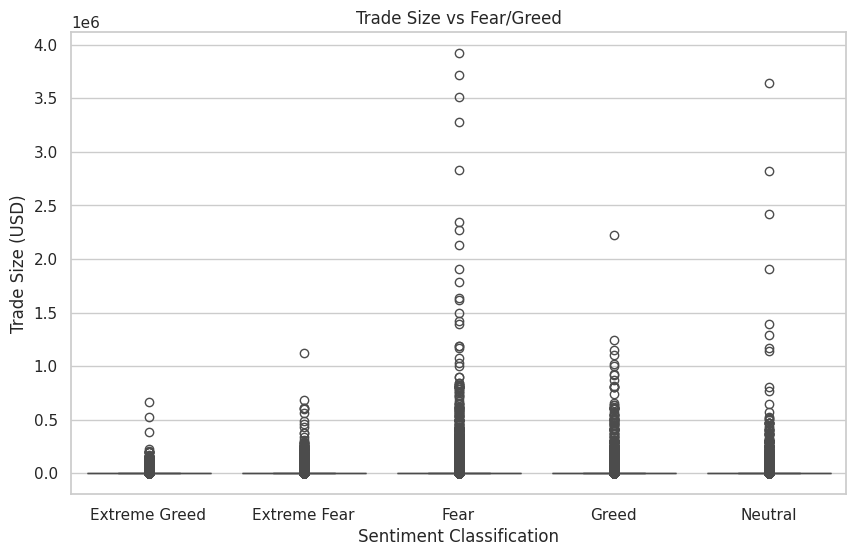

In [28]:
# 3. Trade Size vs Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='Size USD', data=merged_df)
plt.title("Trade Size vs Fear/Greed")
plt.xlabel("Sentiment Classification")
plt.ylabel("Trade Size (USD)")
plt.savefig("outputs/volume_sentiment.png")
plt.show()

In [22]:
# Statistical Analysis
fear_pnl = merged_df[merged_df['classification'] == 'Fear']['Closed PnL']
greed_pnl = merged_df[merged_df['classification'] == 'Greed']['Closed PnL']

fear_leverage = merged_df[merged_df['classification'] == 'Fear']['Estimated Leverage']
greed_leverage = merged_df[merged_df['classification'] == 'Greed']['Estimated Leverage']

fear_size = merged_df[merged_df['classification'] == 'Fear']['Size USD']
greed_size = merged_df[merged_df['classification'] == 'Greed']['Size USD']

In [23]:
# t-test for closedPnL
t_stat_pnl, p_val_pnl = ttest_ind(fear_pnl, greed_pnl, equal_var=False)
print("T-test for PnL:", "t-stat =", t_stat_pnl, ", p-val =", p_val_pnl)

# t-test for leverage
t_stat_lev, p_val_lev = ttest_ind(fear_leverage, greed_leverage, equal_var=False)
print("T-test for Leverage:", "t-stat =", t_stat_lev, ", p-val =", p_val_lev)

# t-test for trade size
t_stat_size, p_val_size = ttest_ind(fear_size, greed_size, equal_var=False)
print("T-test for Trade Size:", "t-stat =", t_stat_size, ", p-val =", p_val_size)


T-test for PnL: t-stat = 1.8511431575014454 , p-val = 0.06415196288057486
T-test for Leverage: t-stat = nan , p-val = nan
T-test for Trade Size: t-stat = 8.342417694322553 , p-val = 7.367395449644324e-17


In [24]:
# ✅ Step 7: Export Merged Data for Review
merged_df.to_csv("csv_files/merged_data.csv", index=False)

print("\nAnalysis complete. Visuals saved to 'outputs' and data saved to 'csv_files'.")


Analysis complete. Visuals saved to 'outputs' and data saved to 'csv_files'.
